# Trabajo Practico Final - Parte 1

## Sección 1 - Presentación del problema específico

El dataset seleccionado corresponde a la informacion de ventas de propiedades en Argentina, en donde se puede estudiar diferentes aspectos que influyen en el precio para entender el comportamiento del mercado inmobiliario en el pais.

El problema que se presenta es el de una empresa que recien se incorpora al mercado inmobiliario y no sabe en que zonas le combiene empezar a desarrollar para sacar la mayor cantidad de ganancias en el menor corto periodo de tiempo

## Sección 2 - Preguntas y Objetivos de la investigación

### *Preguntas Generales:*

- ¿Que tipos de propiedades se venden mas?
- ¿Que lugar (Provincia y ciudad) tiene la mayor densidad de propiedades?
- ¿En que ciudad se venden la mayor cantidad de propiedades y que tipos?
- ¿Que ciudad tiene el mayor ROI sobre cada tipo de propiedades?
- ¿Cuanto tiempo tardan en venderse en promedio las propiedades segun su tipo?
- ¿Es un negocio predecible dado las condiciones en Argentina o alguna vez lo fue? y si lo fue, ¿En que contexto fue?


### *Pregunta Objetivo:*

> En base a todas las variables del dataset descubrir: **¿Cual es la mejor zona para desarrollar propiedades que se puedan vender rapido?, si es asi, ¿Que tipo de propiedades se suelen vender mas rapido?**

En base a esta pregunta, identificar las variables minimas necesarias que puedan resolver las preguntas y asi llegar a una conclusion valida con alto porcentaje de acierto

## Sección 3 - Conformación del equipo de trabajo

El equipo de trabajo esta conformado por los siguientes integrantes:

- Juan Martin Carsillo
- Juan Martin Rodriguez

## Sección 4 - Data Acquisition

Este es un conjunto de datos real creado por la empresa Propearti, una plataforma web y mobile de propiedades que nació para cambiar la forma en que se venden y arriendan inmuebles en Latinoamérica, basicamente, un intermediario entre el comprador y vendedor. Se puede acceder al dataset a traves de este [Link][link].

[link]:[[https://www.kaggle.com/datasets/msorondo/argentina-venta-de-propiedades]

El criterio para el uso del mismo son:

- Amplia variedad de datos
- Es informacion de interes el cual puede retornar dinero
- A simple vista tiene los datos muy completos

Las columnas de los datos son las siguientes:

- `type` - Tipo de aviso (Propiedad, Desarrollo/Proyecto).
- `id` - Identificador del aviso. No es único: si el aviso es actualizado por la inmobiliaria (nueva versión del aviso) se crea un nuevo registro con la misma id pero distintas fechas: de alta y de baja.
- `start_date` - Fecha de alta del aviso.
- `end_date` - Fecha de baja del aviso.
- `created_on` - Fecha de alta de la primera versión del aviso.
- `place` - Campos referidos a la ubicación de la propiedad o del desarrollo.
    - `lat` - Latitud.
    - `lon` - Longitud.
    - `l1` - Nivel administrativo 1: país.
    - `l2` - Nivel administrativo 2: usualmente provincia.
    - `l3` - Nivel administrativo 3: usualmente ciudad.
    - `l4` - Nivel administrativo 4: usualmente barrio.
- `property` - Campos relativos a la propiedad (vacío si el aviso es de un desarrollo/proyecto).
    - `operation` - Tipo de operación (Venta, Alquiler).
    - `type` - Tipo de propiedad (Casa, Departamento, PH).
    - `rooms` - Cantidad de ambientes (útil en Argentina).
    - `bedrooms` - Cantidad de dormitorios (útil en el resto de los países).
    - `bathrooms` - Cantidad de baños.
    - `surface_total` - Superficie total en m².
    - `surface_covered` - Superficie cubierta en m².
    - `price` - Precio publicado en el anuncio.
    - `currency` - Moneda del precio publicado.
    - `price_period` - Periodo del precio (Diario, Semanal, Mensual)
    - `title` - Título del anuncio.
    - `description` - Descripción del anuncio.
- `name` - Nombre del desarrollo.
- `description` - Descripción del anuncio.

### 4.1 - Importacion de librerias

In [60]:
#Librerias extras
! pip install opendatasets --user
! pip install folium --user
! pip install statsmodels --user
! pip install prettytable --user


[notice] A new release of pip available: 22.2.2 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.2.2 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.2.2 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip available: 22.2.2 -> 23.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [61]:
#Tratamiento de datos
import pandas as pd
import numpy as np 
from prettytable import PrettyTable

#Graficos
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium import Marker
from folium.plugins import HeatMap
mpl.style.use('bmh') 

#Tiempo
from datetime import date
from datetime import datetime

# Preprocesado y modelado
# ==============================================================================
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
import statsmodels.formula.api as sm
from sklearn.utils import resample
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

#from sklearn.preprocessing import scale
from sklearn import preprocessing  # Import label encoder


#Dataset
import opendatasets as od

#configuracion de warnings
import warnings
warnings.filterwarnings('ignore')

### 4.2 - Dataset

In [62]:
dataset_url='https://www.kaggle.com/datasets/juanmartnrodrguez/argentina-dataset-propiedades'
od.download(dataset_url)

df = pd.read_csv('./argentina-dataset-propiedades/ar_properties.csv')
df.head(5)

Skipping, found downloaded files in ".\argentina-dataset-propiedades" (use force=True to force download)


,id,ad_type,start_date,end_date,created_on,lat,lon,l1,l2,l3,...,bathrooms,surface_total,surface_covered,price,currency,price_period,title,description,property_type,operation_type
0,wdQ5hWhv8P14T7Sh9g4QCg==,Propiedad,2020-12-25,9999-12-31,2020-12-25,-32.716652,-68.642692,Argentina,Mendoza,NaN,...,NaN,350.0,350.0,NaN,NaN,NaN,Excelentes Lotes Sobre Ruta 34,Corredor Responsable: VICTOR E. MONTIVERO - C....,Lote,Venta
1,nnMBYZ4RMRY+vm753EtA+g==,Propiedad,2020-12-25,9999-12-31,2020-12-25,-24.797723,-65.467514,Argentina,Salta,NaN,...,NaN,1541.0,1541.0,NaN,NaN,Mensual,TERRENO + VENTA + JARDINES DE SAN LORENZO +150...,Corredor Responsable: Pablo Castañeda - C.U.C....,Lote,Venta
2,+dnVA1K6JxzL1zAjOEQ1pA==,Propiedad,2020-12-25,2020-12-29,2020-12-25,-34.919373,-58.020591,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,...,NaN,1000.0,1000.0,NaN,NaN,Mensual,Lote en Venta de 1000 m2 en La Plata,Corredor Responsable: Rico Sebastián - Martill...,Lote,Venta
3,dLHXKN5/sRZpm9Yk0yI2nA==,Propiedad,2020-12-25,2020-12-29,2020-12-25,-34.919455,-58.024807,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,...,NaN,1000.0,1000.0,NaN,NaN,Mensual,Lote en Venta de 1000 m2 en La Plata,Corredor Responsable: Rico Sebastián - Martill...,Lote,Venta
4,wtw/k887EPipd37UYHKb1Q==,Propiedad,2020-12-25,9999-12-31,2020-12-25,-34.364924,-58.783143,Argentina,Bs.As. G.B.A. Zona Norte,Escobar,...,NaN,18164.0,18164.0,NaN,NaN,Mensual,PANAMERICANA 47300,Nave principal 66 x 90 m: 6005 m2 cubiertos...,Otro,Venta


### 4.3 - Preprocesamiento de datos y limpieza

Primero filtrar por las caracteristicas que precisamos:

- Que sea de Argentina
- Que la propiedad este terminada y vendida
- Que sea una propiedad; que no sea Desarrollo o proyecto
- Que en el precio no este en nulo y que esté en dolares

In [63]:
df = df[(df['l1'] == 'Argentina') & (df['currency'] == 'USD') & (df['operation_type'] == 'Venta')]
df.shape

(716826, 25)

Vamos a agregar una columna para la cantidad de tiempo que estuvieron en el mercado las propiedades

Cambio de formato en columnas de fecha, reemplazo de datos con fecha indefinida (para no exceder el Timestamp) y creación de una nueva columna informando sin finalizó, o no, el anuncio.

In [64]:
from datetime import date
from datetime import datetime

today = date.today()
now = datetime.now()

df.columns
pd.Timestamp.max

df = df.replace({"9999-12-31" : "2250-12-31"})

df['finalizo_anuncio'] = np.where(df['end_date'] == '2250-12-31', 'No', 'Si')

df['start_date'] = pd.to_datetime(df['start_date'], format = '%Y-%m-%d')
df['end_date'] = pd.to_datetime(df['end_date'], format = '%Y-%m-%d')
df = df[df['finalizo_anuncio'] == 'Si']

Una vez filtrados los datos ya cumplimos las especificaciones principales, que se haya vendido, que sea de Argentina y que el precio sea en USD.

Ahora hay que pasar a limpiar la data de valores nulos y poner los tipos de datos como corresponden

In [65]:
df = df.dropna(subset=['price','surface_total','surface_covered','price_period','bathrooms','bedrooms','rooms'])

#Cambiar tipos de datos
df['bathrooms'] = df['bathrooms'].astype(int)
df['price'] = df['price'].astype(float)
df['surface_total'] = df['surface_total'].astype(float)
df['surface_covered'] = df['surface_covered'].astype(float)
df['bedrooms'] = df['bedrooms'].astype(int)
df['rooms'] = df['rooms'].astype(int)
df = df.drop(columns=['ad_type','l5','l6','operation_type','currency','l1']) #Elimino estas columnas ya que algunas tienen el mismo valor para todos los datos y l5 y l6 tiene demasiado valores nulos
df.shape

(38388, 20)

In [66]:
df.columns

Index(['id', 'start_date', 'end_date', 'created_on', 'lat', 'lon', 'l2', 'l3',
       'l4', 'rooms', 'bedrooms', 'bathrooms', 'surface_total',
       'surface_covered', 'price', 'price_period', 'title', 'description',
       'property_type', 'finalizo_anuncio'],
      dtype='object')

In [67]:
df['Tiempo'] = (df['end_date'] - df['start_date']) / np.timedelta64(1,'D')
df['Tiempo'] = df['Tiempo'].astype(int)

In [68]:
df['year'] = df['end_date'].dt.year

## Sección 5 - EDA (análisis univariado, bivariado y multivariado)

In [69]:


# Genero una función que realiza una tabla resumen de los campos del dataframe

def df_explore(df):
    #Description table of the main characteristics of each column from a dataset
    print( 'Shape: ', df.shape)
    
    t = PrettyTable(['Column', 
                     'Type',
                     'Non-Null',
                     'Nulls',
                     'Unique',
                    ])
    
    for c in df.columns:
        #print(df[~df[c].isnull()][c].iloc[0])
        t.add_row([c,
                   df[c].dtype,
                   len(df[c])-np.sum(df[c].isna()),
                   np.sum(df[c].isna()),
                   np.count_nonzero(df[c].unique()),
                   #df[~df[c].isnull()][c].iloc[0],
                  ]) 
        
        
        
    print(t)
    print()
    return

df_explore(df)



Shape:  (38388, 22)
+------------------+----------------+----------+-------+--------+
|      Column      |      Type      | Non-Null | Nulls | Unique |
+------------------+----------------+----------+-------+--------+
|        id        |     object     |  38388   |   0   | 38388  |
|    start_date    | datetime64[ns] |  38388   |   0   |  298   |
|     end_date     | datetime64[ns] |  38388   |   0   |  422   |
|    created_on    |     object     |  38388   |   0   |  298   |
|       lat        |    float64     |  33728   |  4660 | 19753  |
|       lon        |    float64     |  33728   |  4660 | 19739  |
|        l2        |     object     |  38388   |   0   |   22   |
|        l3        |     object     |  37705   |  683  |  241   |
|        l4        |     object     |  12088   | 26300 |  443   |
|      rooms       |     int32      |  38388   |   0   |   21   |
|     bedrooms     |     int32      |  38388   |   0   |   19   |
|    bathrooms     |     int32      |  38388   |   0   |

Verificamos si hay lineas duplicadas

In [70]:
df.duplicated().any()

False

In [71]:
df.shape

(38388, 22)

### 5.1 - Estadistica descriptiva

In [72]:
df.describe().round(2).T

,count,mean,std,min,25%,50%,75%,max
lat,33728.0,-34.46,1.09,-50.34,-34.62,-34.58,-34.48,-24.73
lon,33728.0,-58.89,1.55,-72.26,-58.65,-58.47,-58.42,-54.13
rooms,38388.0,3.42,1.60,1.00,2.00,3.00,4.00,32.00
bedrooms,38388.0,2.25,1.19,1.00,1.00,2.00,3.00,34.00
bathrooms,38388.0,1.77,1.02,1.00,1.00,1.00,2.00,13.00
surface_total,38388.0,147.18,1019.99,10.00,56.00,88.00,167.00,175000.00
surface_covered,38388.0,126.78,1558.62,1.00,50.00,77.00,144.00,235000.00
price,38388.0,263493.23,304968.66,5000.00,113598.00,179936.00,300000.00,7400000.00
Tiempo,38388.0,55.28,69.40,0.00,7.00,27.00,82.00,418.00
year,38388.0,2020.17,0.38,2019.00,2020.00,2020.00,2020.00,2021.00


In [73]:
df.shape

(38388, 22)

<AxesSubplot:xlabel='year', ylabel='id'>

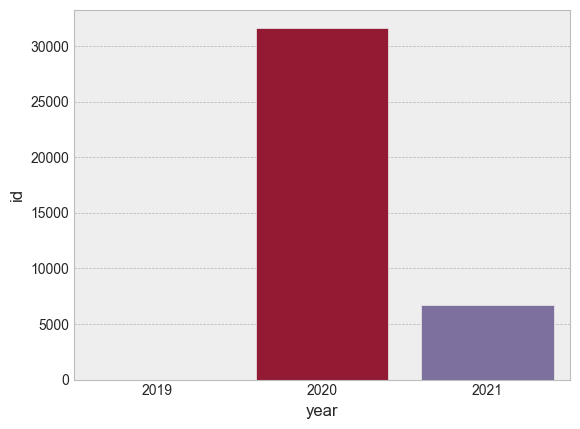

In [74]:
gk = df[['id','year']].groupby('year').count().reset_index()
sns.barplot(data=gk,x='year',y='id')


### Mapa de densidad 

In [75]:
map_2 = folium.Map(width = 800, height = 900, location=[-38.371135, -64.368148], titles="cartodbposition", zoom_start=4.5)
df_Ctemp = df[df["lat"].notnull() & df["lon"].notnull()]
HeatMap(data=df_Ctemp[["lat","lon"]], radius=13).add_to(map_2)

map_2

### 5.2 - Analisis Univariado

In [76]:
Num_variables = ['rooms','bedrooms','bathrooms','surface_total','surface_covered','price']

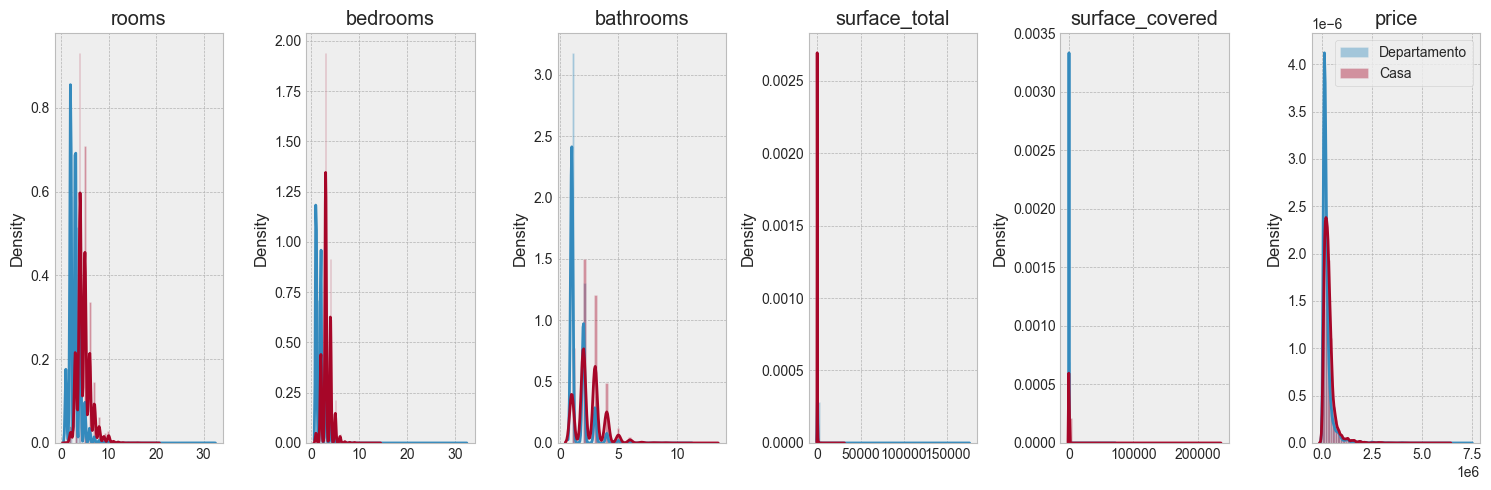

In [77]:
fig, axes = plt.subplots(1, 6, figsize=(15,5))

F = df[df['property_type']=='Departamento']
M = df[df['property_type']=='Casa']

for i, variable in enumerate(Num_variables):

    sns.distplot(F[variable],label= 'Departamento', ax=axes[i])
    sns.distplot(M[variable],label= 'Casa', ax=axes[i])
    
    axes[i].set_title(variable)
    axes[i].set_xlabel("")

plt.tight_layout()
plt.legend()
plt.show()

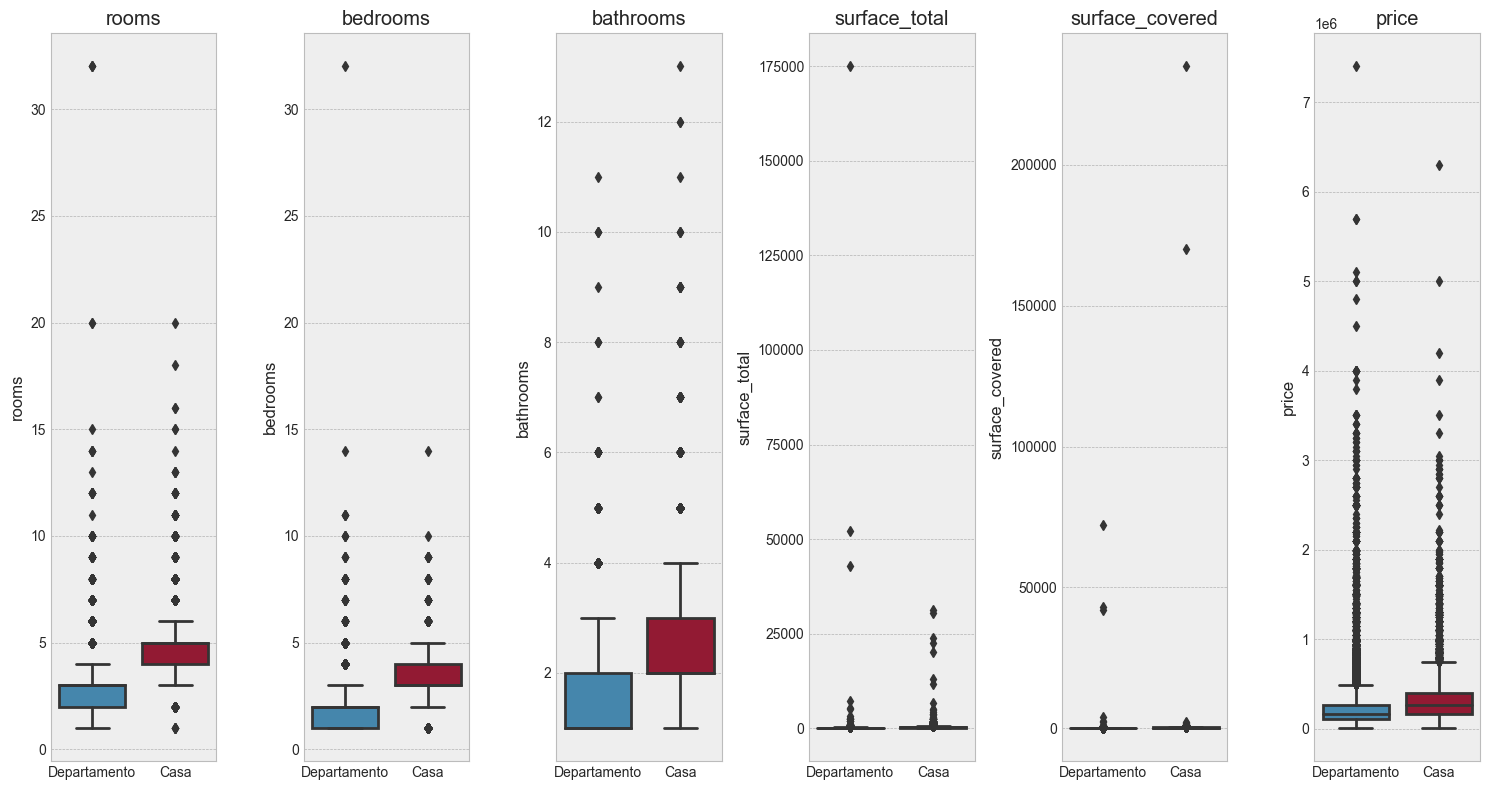

In [78]:
fig, axes = plt.subplots(1, 6, figsize=(15,8))

F = df[(df['property_type']=='Departamento') | (df['property_type']=='Casa')]

for i, variable in enumerate(Num_variables):
        
    sns.boxplot(y=F[variable], x = F['property_type'], orient = 'v', ax=axes[i])
    axes[i].set_title(variable)
    axes[i].set_xlabel("")

plt.tight_layout()

Como observamos en este grafico, hay muchos outliers en la variable precio, la cual mas adelante hay que sacar porque probablemente afecte al analisis predictivo.

Outliers:

> Se considera que estos outliers no se deben a errores de tipeo en el archivo, sino a situaciones particulares de estas variables, donde hay valores que no son tan comunes.

### 5.3 - Analisis Bivariado

Aca analizamos la interrelaciones entre variables numericas

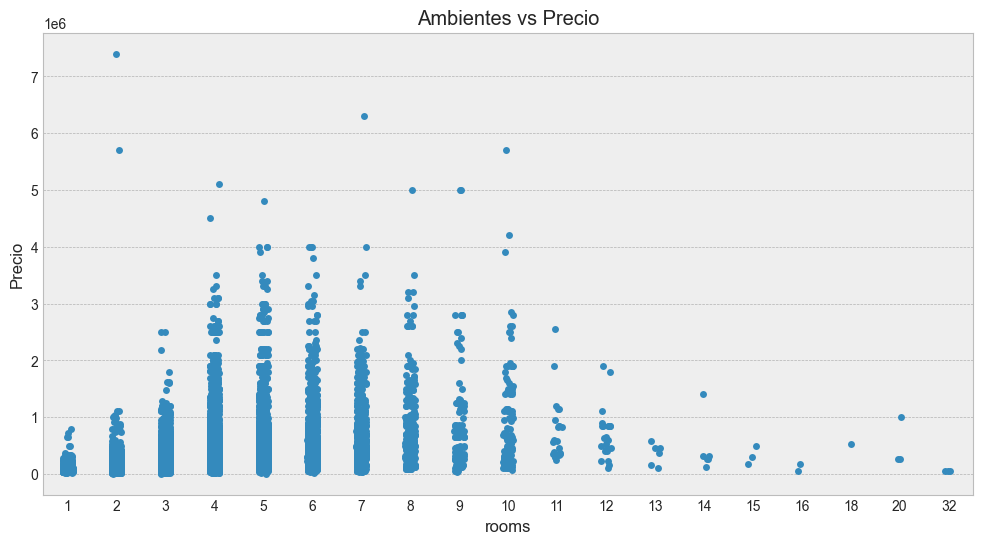

In [79]:
F = df[(df['property_type']=='Departamento') | (df['property_type']=='Casa')]

plt.subplots(figsize=(12,6))

ax = sns.stripplot(x="rooms", y="price", data=F)
plt.ylabel('Precio')
plt.title("Ambientes vs Precio")
plt.show()


Como vemos la mayor concentracion de ambientes esta entre 3 y 6 ambientes. Tenemos en cuenta que estamos analizando Casas y Departamentos

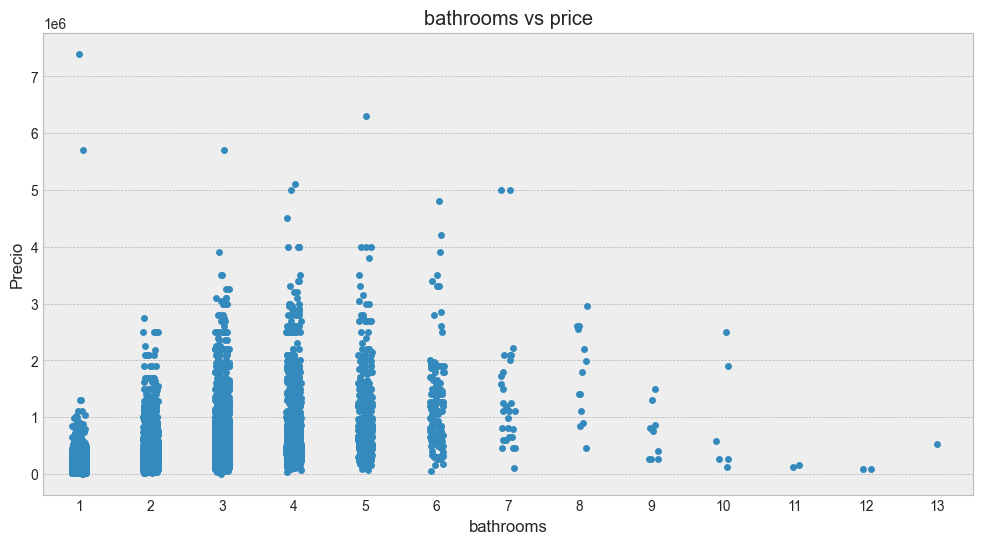

In [80]:
F = df[(df['property_type']=='Departamento') | (df['property_type']=='Casa')]

plt.subplots(figsize=(12,6))

ax = sns.stripplot(x="bathrooms", y="price", data=F)
plt.ylabel('Precio')
plt.title("bathrooms vs price")
plt.show()

Como vemos la mayor concentracion de baños esta entre 3 y 5 ambientes.

<AxesSubplot:xlabel='end_date', ylabel='price'>

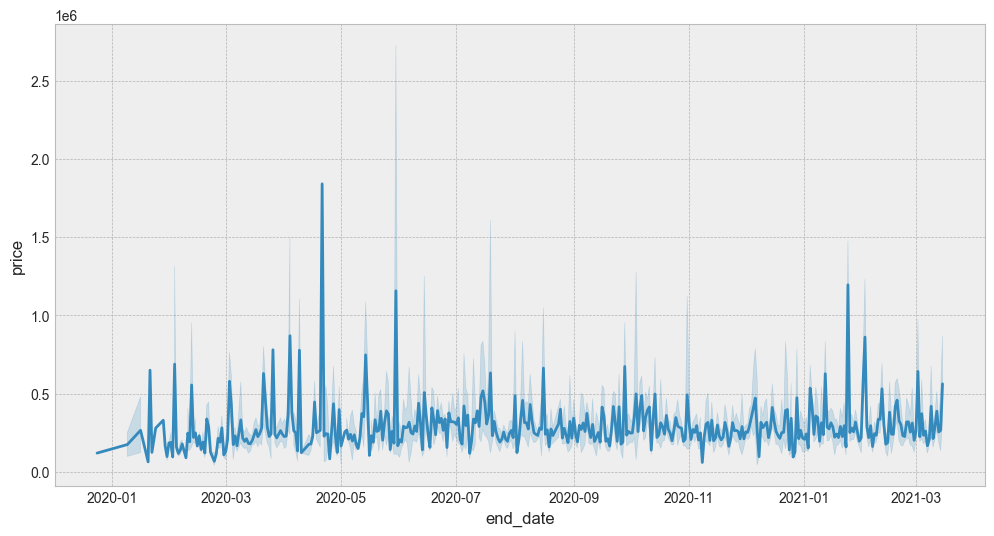

In [81]:
F = F[F['l2']=='Capital Federal']

plt.subplots(figsize=(12,6))
sns.lineplot(data=F,x="end_date",y="price")


Como vemos en Capital Federal no hay una tendencia del precio no es clara, va lateralizando salvo por unos picos en el precio que se escapan de toda lateralizacion, asi que no podemnos identificar si es que realmente las propiedades se apreciaron a lo largo del tiempo

### 5.4 - Analisis Multivariado

In [82]:
df.columns

Index(['id', 'start_date', 'end_date', 'created_on', 'lat', 'lon', 'l2', 'l3',
       'l4', 'rooms', 'bedrooms', 'bathrooms', 'surface_total',
       'surface_covered', 'price', 'price_period', 'title', 'description',
       'property_type', 'finalizo_anuncio', 'Tiempo', 'year'],
      dtype='object')

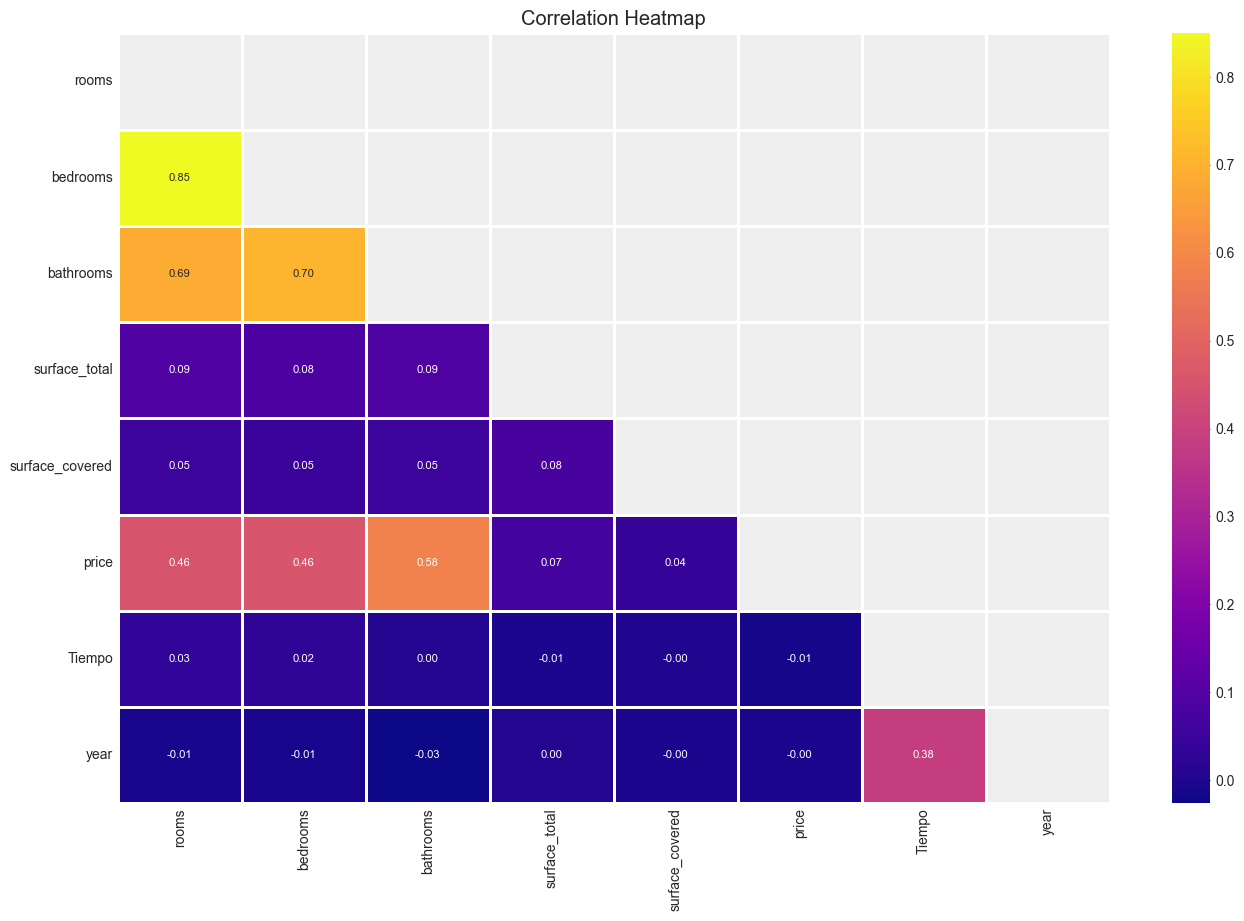

In [83]:

df_ = df.drop(columns=['id','start_date','end_date','created_on','l4','title','description','price_period','lat','lon'])

plt.figure(figsize= (16,10))
mask = np.triu(np.ones_like(df_.corr(),dtype = bool))
sns.heatmap(df_.corr(),mask = mask, fmt = ".2f",annot=True,lw=1,cmap = 'plasma', annot_kws={'size':8})
plt.yticks(rotation = 0)
plt.xticks(rotation = 90)
plt.title('Correlation Heatmap')
plt.show()

**Listamos a continuación aquellos pares de variables que tienen un coeficiente de correlación superior a 0,7.**

|Coeficiente de correlacion|Variable 1| Variable 2|
|:-----:|:-------------:|:-----------:|
|0,85|bedrooms|rooms|
|0,70|bathrooms|bedrooms|
|0,69|bathrooms|rooms|



Text(0, 0.5, '')

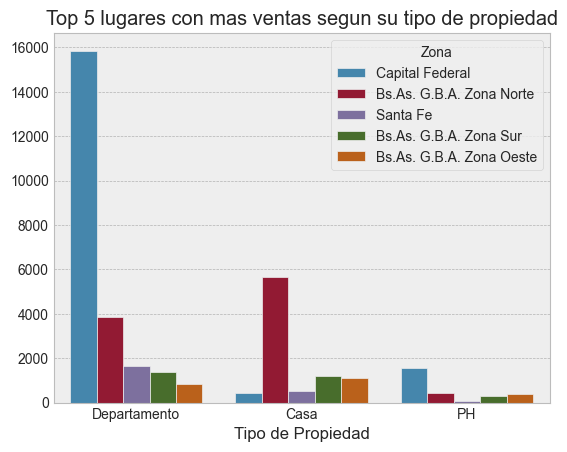

In [84]:
top_5_lugares_con_mas_ventas = df.groupby(["l2","property_type"]).count().reset_index()
top_5_lugares_con_mas_ventas = top_5_lugares_con_mas_ventas[['l2','property_type','id']]
top_5_lugares_con_mas_ventas = top_5_lugares_con_mas_ventas[(top_5_lugares_con_mas_ventas['l2'] == 'Capital Federal') | (top_5_lugares_con_mas_ventas['l2'] == 'Bs.As. G.B.A. Zona Sur') | (top_5_lugares_con_mas_ventas['l2'] == 'Bs.As. G.B.A. Zona Norte') | (top_5_lugares_con_mas_ventas['l2'] == 'Bs.As. G.B.A. Zona Oeste') | (top_5_lugares_con_mas_ventas['l2'] == 'Santa Fe')]
top_5_lugares_con_mas_ventas = top_5_lugares_con_mas_ventas[(top_5_lugares_con_mas_ventas['property_type'] == 'Departamento') | (top_5_lugares_con_mas_ventas['property_type'] == 'Casa') | (top_5_lugares_con_mas_ventas['property_type'] == 'PH')]

top_5_lugares_con_mas_ventas = top_5_lugares_con_mas_ventas.sort_values(by=['id'],ascending=False)
top_5_lugares_con_mas_ventas = top_5_lugares_con_mas_ventas.rename(columns={'l2':'Zona'})

sns.barplot(data=top_5_lugares_con_mas_ventas,x='property_type',y='id',hue='Zona')
plt.title("Top 5 lugares con mas ventas segun su tipo de propiedad")
plt.xlabel('Tipo de Propiedad')
plt.ylabel("")

Dada esta nueva informacion, nos vamos a ir enfoncando mas en los departamentos en Capital Federal

<AxesSubplot:xlabel='price', ylabel='l3'>

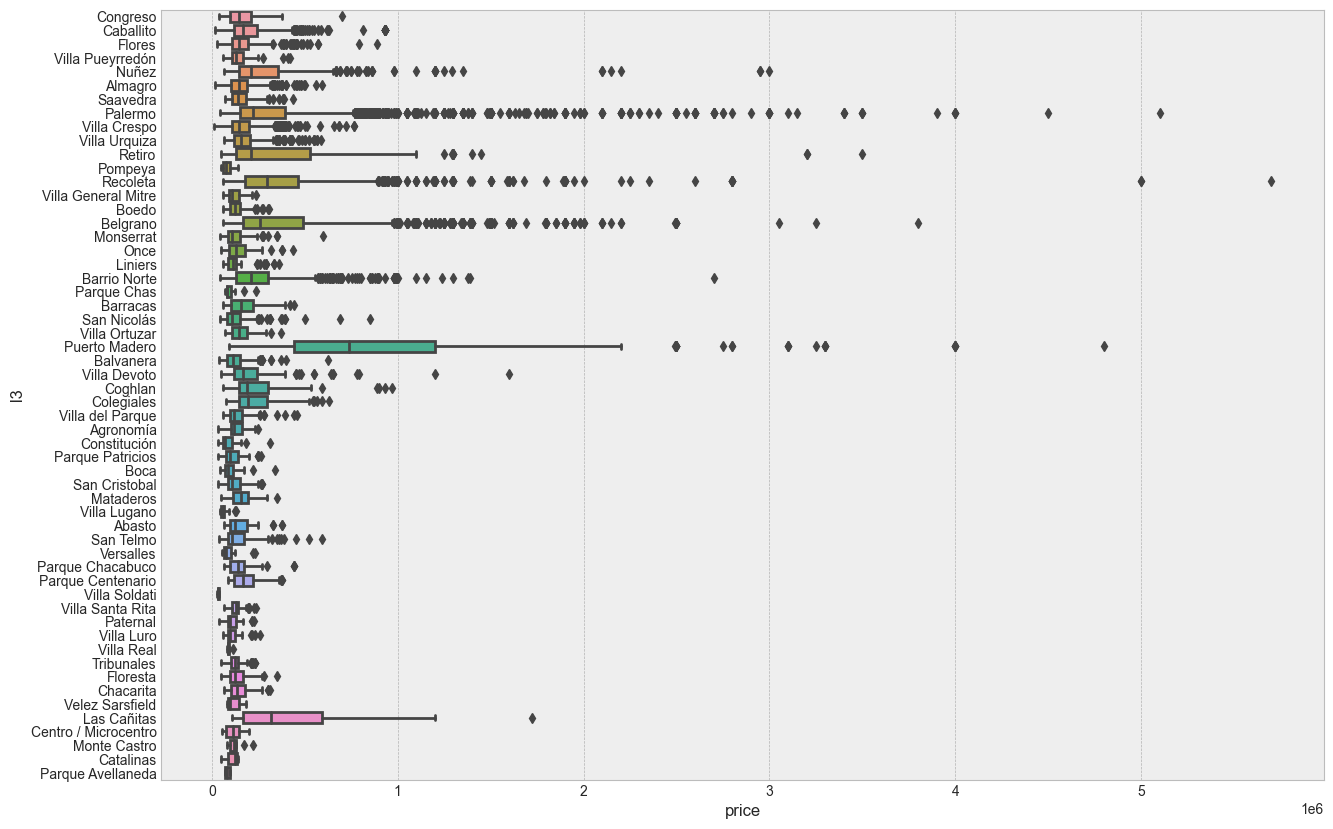

In [85]:
temp = df[(df['property_type'] == 'Departamento') & (df['l2'] == 'Capital Federal')]

fig, ax = plt.subplots(figsize=(15, 10))

sns.boxplot(data=temp,x='price',y='l3',orient='h')

Como vemos hay mucho outliers los cuales vamos a eliminar

In [86]:
df = df[(df['l2'] == 'Capital Federal')]
df = df[(df['property_type'] == 'Departamento')]

<AxesSubplot:xlabel='price', ylabel='l3'>

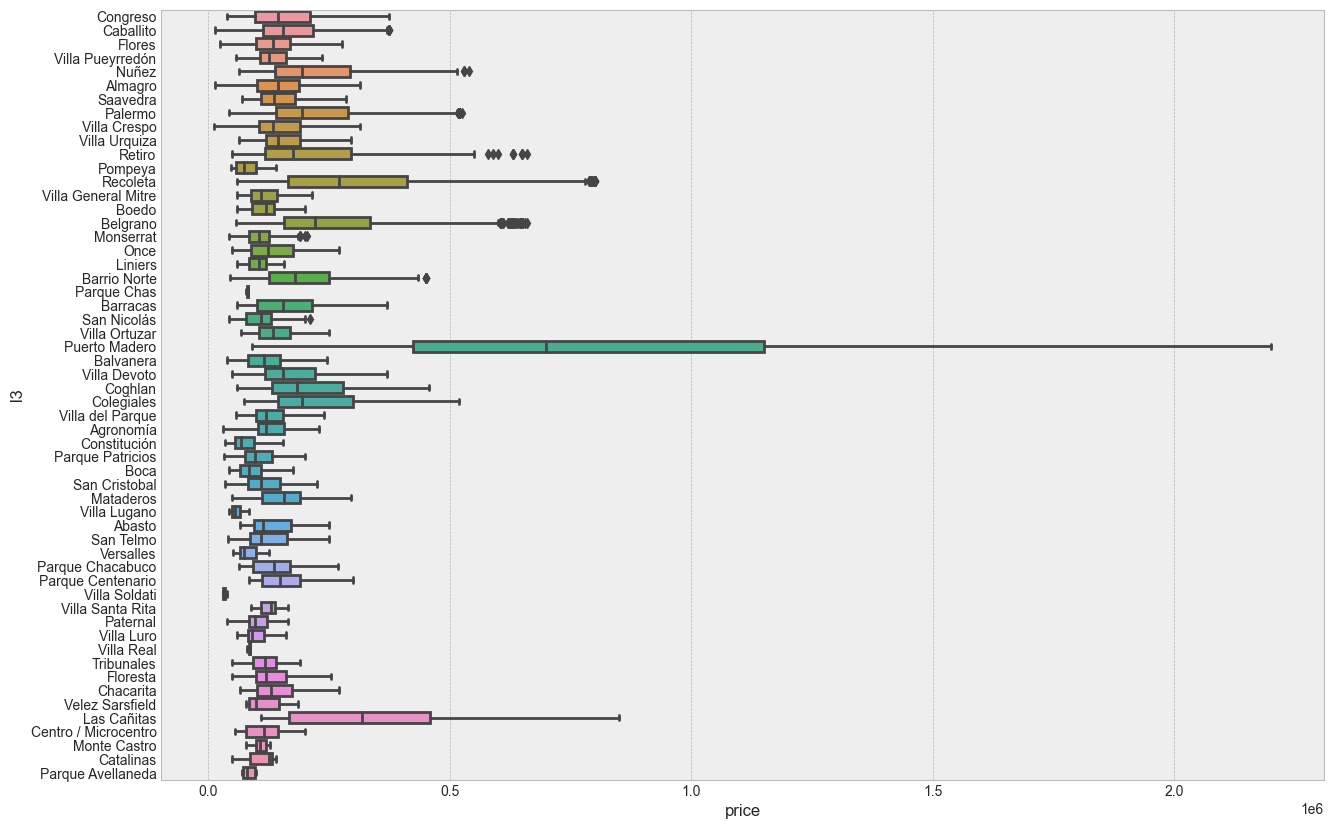

In [87]:
#Data sin outliers
fig, ax = plt.subplots(figsize=(15, 10))
l3 = df['l3'].unique()
df_sin_outliers = df
df_final = pd.DataFrame()
df_final2 = pd.DataFrame()
df_final3 = pd.DataFrame()

def outliers(df,i,feature):
    Q1= df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR
    return upper_limit, lower_limit

for i in l3:
    i = str(i)
    upper, lower = outliers(df[df['l3']==i],i,"price") 
    #print(i,': ',upper)
    df_final = pd.concat([df_final,df[(df['l3'] == i) & (df['price'] < upper) & (df['price'] > lower)]])
    
for i in l3:
    i = str(i)
    upper, lower = outliers(df_final[df_final['l3']==i],i,"price") 
    #print(i,': ',upper)
    df_final2 = pd.concat([df_final2,df_final[(df_final['l3'] == i) & (df_final['price'] < upper) & (df_final['price'] > lower)]])

for i in l3:
    i = str(i)
    upper, lower = outliers(df_final2[df_final2['l3']==i],i,"price") 
    #print(i,': ',upper)
    df_final3 = pd.concat([df_final3,df_final2[(df_final2['l3'] == i) & (df_final2['price'] < upper) & (df_final2['price'] > lower)]])


sns.boxplot(data=df_final3,x='price',y='l3',orient='h')

Ahora podemos ver la data sin outliers, como vemos está mucho mas limpio

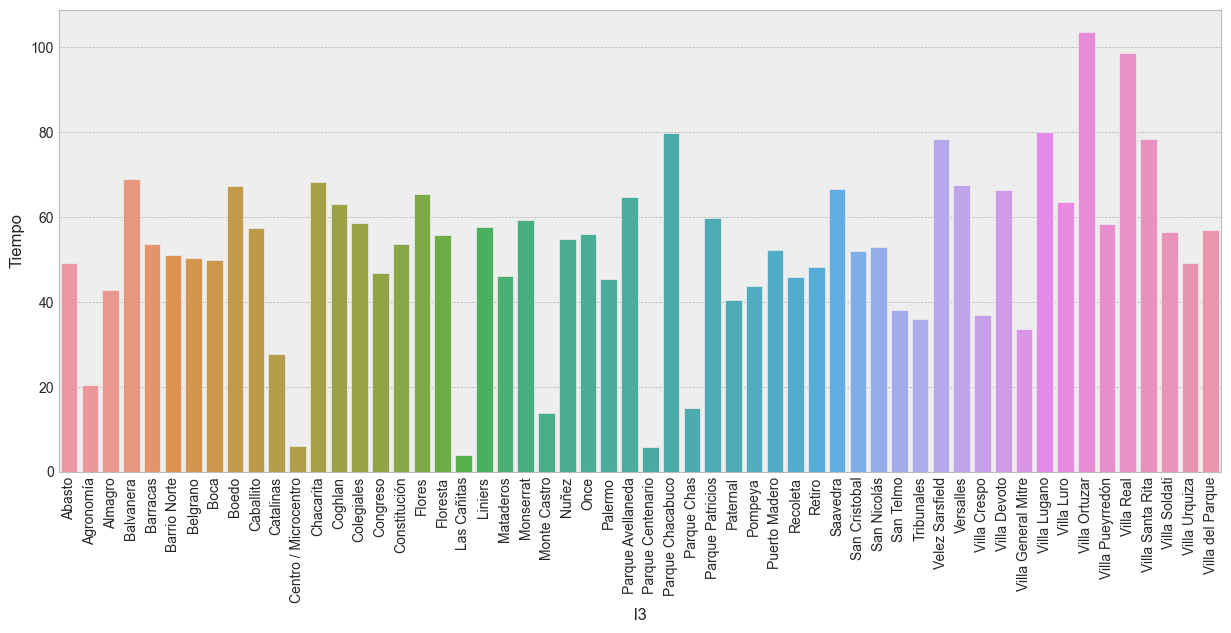

In [88]:
temporal = temp.groupby("l3").mean().reset_index()

fig, ax = plt.subplots(figsize=(15, 6))

sns.barplot(data=temporal,x='l3',y='Tiempo')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, horizontalalignment='center')
plt.show()

Como vemos las zonas donde mas rapido se venden en promedio son Centro / Microcentro , Las cañitas y Parque Centenario

In [89]:
temporal = temporal[(temporal['l3'] == 'Centro / Microcentro') | (temporal['l3'] == 'Las Cañitas') | (temporal['l3'] == 'Parque Centenario')]
temporal[['l3','Tiempo','price']]

,l3,Tiempo,price
11,Centro / Microcentro,6.000000,116618.750
19,Las Cañitas,3.968750,435890.625
28,Parque Centenario,5.857143,185732.250


Analizamos la correlacion entre el tiempo de mercado y el precio

In [90]:
model1 = 'price~Tiempo'
lm1   = sm.ols(formula = model1, data = df_final3).fit()
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.3491
Date:                Sat, 18 Mar 2023   Prob (F-statistic):              0.555
Time:                        12:13:49   Log-Likelihood:            -1.8964e+05
No. Observations:               14093   AIC:                         3.793e+05
Df Residuals:                   14091   BIC:                         3.793e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.109e+05   1771.863    119.003      0.0

## Sección 6 - Contar la historia de sus datos

**Resumen de las observaciones**

Como punto de partida estamos en Argentina donde los precios cambian constantemente y eso hace que sea complicado poder predecir con exactitud, pero aceptando eso de entrada, podemos notar que:

- El precio no tiene correlacion con el tiempo que estuvieron en el mercado
- Sabemos que zona es donde mas se vendieron propiedades, especificamente departamentos, en Capital Federal, suponemos por la gran cantidad de edificios
- Las zonas donde mas rapido se vendieron departamentos en promedio son: Centro/Microcentro, Las Cañitas y Parque centenario

Entonces respondiendo a la pregunta, en el Centro/Microcentro, Las Cañitas y Parque Centenario son los lugares en Capital Federal donde mas rapido se venden los departamentos.
- Centro/Microcentro, promedio de 6 dias.
- Las Cañitas, promedio de 4 dias.
- Parque Centenario, promedio de 6 dias.

Vale agregar lo siguiente, en las zonas donde mas variabilidad del precio es donde mas caras son, Puerto madero, Las cañitas, Belgrano por ejemplo. Esto nos pone en comun una locacion en particular, Las Cañitas, que parece ser una zona donde mas rapido se venden los departamentos y en media son uno de los mas caros (U$D 435.890).

Finalmente, a partir de un analisis multivariado podemos listar aquellos pares de variables que tienen un coeficiente de correlación superior a 0,7.

|Coeficiente de correlacion|Variable 1| Variable 2|
|:-----:|:-------------:|:-----------:|
|0,85|bedrooms|rooms|
|0,70|bathrooms|bedrooms|
|0,69|bathrooms|rooms|

## Sección 7 - Dataset final para analizar

In [91]:
df_final3.columns

Index(['id', 'start_date', 'end_date', 'created_on', 'lat', 'lon', 'l2', 'l3',
       'l4', 'rooms', 'bedrooms', 'bathrooms', 'surface_total',
       'surface_covered', 'price', 'price_period', 'title', 'description',
       'property_type', 'finalizo_anuncio', 'Tiempo', 'year'],
      dtype='object')

**Nos vamos a quedar con las siguientes columnas:**

1. Numericas

- `rooms`
- `bathrooms`
- `surface_total`
- `surface_covered`
- `price`
- `Tiempo`

2. Categoricas

- `l3`


In [92]:
df_1 = df_final3.drop(columns=['id','start_date','end_date','created_on','lat', 'lon','l2','l4','price_period', 'title', 'description',
       'property_type', 'finalizo_anuncio'])

In [93]:
# Pasamos a numerico las variables categoricas
# label_encoder nos permite dar un codigo numerico a cada variable categorica.
le_l3 = preprocessing.LabelEncoder()

ids = le_l3.fit_transform(df_1['l3'])
df_1['l3'] = ids




df_1

,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,Tiempo,year
371,15,2,1,1,49.0,46.0,74000.0,72,2021
4748,15,1,1,1,38.0,34.0,70000.0,13,2020
6844,15,1,1,1,28.0,28.0,53000.0,0,2020
18822,15,4,3,2,154.0,154.0,210000.0,5,2020
21663,15,4,3,2,154.0,154.0,265000.0,8,2020
...,...,...,...,...,...,...,...,...,...
326469,27,2,1,1,69.0,31.0,79900.0,212,2021
391653,27,4,3,1,80.0,76.0,97500.0,4,2020
558339,27,2,1,1,40.0,38.0,70000.0,20,2020
579833,27,2,1,1,52.0,36.0,72900.0,57,2020


## Sección 8 - Análisis de componentes principales.

In [94]:
# Entrenamiento modelo PCA con escalado de los datos
# ==============================================================================
pca_pipe = make_pipeline(StandardScaler(), PCA())
pca_pipe.fit(df_1)

# Se extrae el modelo entrenado del pipeline
modelo_pca = pca_pipe.named_steps['pca']

In [95]:
pca_pipe.fit(df_1)

Pipeline(steps=[('standardscaler', StandardScaler()), ('pca', PCA())])

In [96]:
# Se combierte el array a dataframe para añadir nombres a los ejes.
pd.DataFrame(
    data    = modelo_pca.components_,
    columns = df_1.columns,
    index   = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6',
              'PC7', 'PC8','PC9']
)

,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,Tiempo,year
PC1,-0.032756,0.516781,0.522429,0.474767,0.152504,0.148469,0.433385,0.014717,0.013726
PC2,0.012338,-0.119330,-0.117536,-0.102559,0.689947,0.691249,-0.080981,-0.024338,-0.016528
PC3,-0.026884,-0.005281,-0.006621,-0.032088,0.017437,0.016765,-0.010831,0.706751,0.705674
PC4,0.979794,-0.067980,-0.057720,0.065382,-0.004627,-0.005695,0.155358,-0.015839,0.057747
PC5,-0.192393,-0.449474,-0.427256,0.371270,-0.007975,-0.010394,0.636006,-0.127528,0.140109
PC6,0.014656,-0.074128,-0.100887,0.063177,-0.001380,0.004749,0.139082,0.694553,-0.691627
PC7,0.028199,-0.153513,-0.066153,0.783497,0.003136,0.005763,-0.597319,0.023613,0.001899
PC8,0.005472,0.694950,-0.716083,0.055432,0.002492,0.000560,-0.026837,-0.014472,0.015218
PC9,-0.000185,-0.002317,-0.000403,-0.000465,0.707325,-0.706863,-0.002981,0.002904,-0.003688


Porcentaje de varianza explicada por cada componente
[0.32250232 0.21642874 0.15672137 0.11224877 0.07602588 0.06497055
 0.04028794 0.00975677 0.00105766]


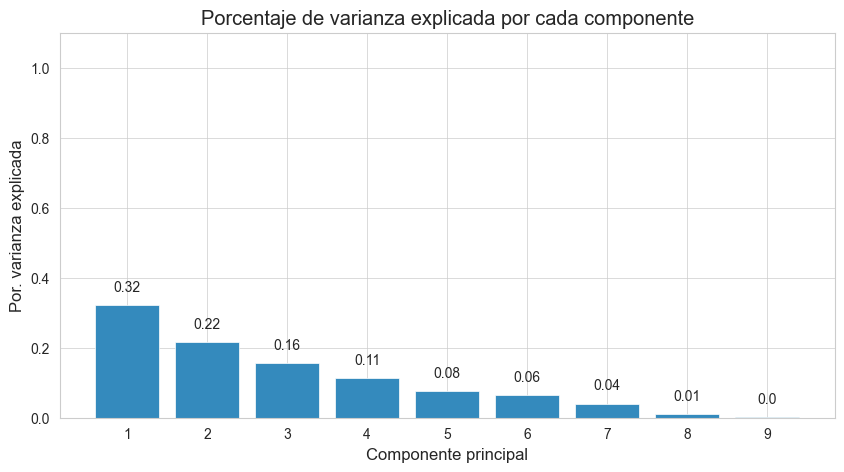

In [97]:
print('Porcentaje de varianza explicada por cada componente')
print(modelo_pca.explained_variance_ratio_)
sns.set_style("whitegrid")
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
ax.bar(x= np.arange(modelo_pca.n_components_) + 1,height = modelo_pca.explained_variance_ratio_)
for x, y in zip(np.arange(len(df_1.columns)) + 1, modelo_pca.explained_variance_ratio_):
    label = round(y, 2)
    ax.annotate(label,(x,y),textcoords="offset points",xytext=(0,10),ha='center')
ax.set_xticks(np.arange(modelo_pca.n_components_) + 1);ax.set_ylim(0, 1.1)
ax.set_title('Porcentaje de varianza explicada por cada componente')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza explicada');

**OBS:** Vemos que la primera componente explica el 32% de la varianza, el segundo un 22%, el tercero y cuarto aproximadamente entre 16 y 11% y los demas no pasan del 8%

------------------------------------------
Porcentaje de varianza explicada acumulada
------------------------------------------
[0.32250232 0.53893106 0.69565243 0.80790119 0.88392708 0.94889763
 0.98918557 0.99894234 1.        ]


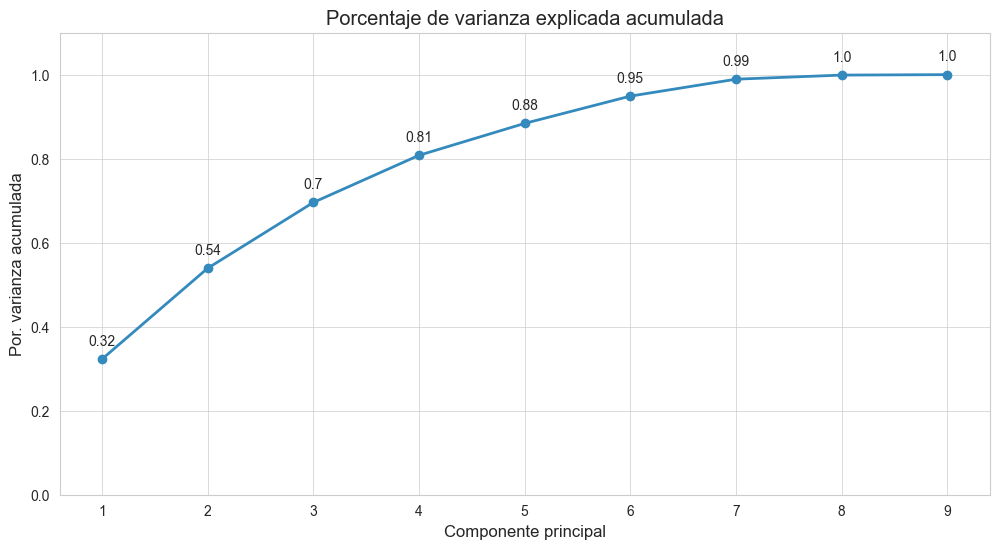

In [98]:
# Porcentaje de varianza explicada acumulada
# ==============================================================================
prop_varianza_acum = modelo_pca.explained_variance_ratio_.cumsum()
print('------------------------------------------')
print('Porcentaje de varianza explicada acumulada')
print('------------------------------------------')
print(prop_varianza_acum)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 6))
ax.plot(
    np.arange(len(df_1.columns)) + 1,
    prop_varianza_acum,
    marker = 'o'
)

for x, y in zip(np.arange(len(df_1.columns)) + 1, prop_varianza_acum):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )
    
ax.set_ylim(0, 1.1)
ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_title('Porcentaje de varianza explicada acumulada')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza acumulada');

**Si se utilizaran las primeras 7 componentes se explicarian el 99% de la variabilidad.**

pero a estos efectos, no hay resultados concluyentes para la reduccion de la dimensionalidad.

## Seccion 9 - Plantear objetivo/s para esos datos.

Luego de análisis el dataset, su limpieza, y entender a mayor profundidad la relación entre algunas variables; decidimos eliminar algunas por redundancia ya que no agregan nueva información.

Nuestro objetivo a futuro será implementar las técnicas vistas en clase para generar un modelo que nos ayude a predecir los precios de las propiedades en funcion de su ubicacion y caracteristicas para obtener una mayor rentabilidad. Ese modelo será puesto a prueba usando en principio un grupo de test del mismo dataset, y si obtenermos resultados con un buen accuracy, podriamos implementarlo a futuro con otro dataset, por ejemplo, con datos de otra localidad o incluso pais. De haber cambios, se deben introducir nuevas variables en nuestro modelo.

## Seccion 10 - Modelo de Regresion y Evaluacion

En esta seccion vamos a intentar aplicar y averiguar en que barrios es mas posible predecir los precios debido a la correlacion

Para eso importamos la libreria SKlearn con sus respectivas funciones
- LinearRegression = Modelo de regresion lineal
- train_test_split = separa la data entre data de entrenamiento y testeo
- r2_score = para evaluar la correlacion y poder medir que tan bien esta el modelo

Despues eliminamos columnas que no sirven para lo que necesitamos


In [99]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


In [100]:
#Final Dataset
df_1 = df_1.drop(columns=['Tiempo','year'])
df_1

,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price
371,15,2,1,1,49.0,46.0,74000.0
4748,15,1,1,1,38.0,34.0,70000.0
6844,15,1,1,1,28.0,28.0,53000.0
18822,15,4,3,2,154.0,154.0,210000.0
21663,15,4,3,2,154.0,154.0,265000.0
...,...,...,...,...,...,...,...
326469,27,2,1,1,69.0,31.0,79900.0
391653,27,4,3,1,80.0,76.0,97500.0
558339,27,2,1,1,40.0,38.0,70000.0
579833,27,2,1,1,52.0,36.0,72900.0


Ahora vamos a probar un modelo simple de regresion lineal multiple para cada barrio de Capital Federal

In [101]:
nombre_barrios = df_1.l3.unique()


for i in nombre_barrios:
    X = df_1[df_1['l3'] == i].drop(columns='price')
    Y = df_1[df_1['l3'] == i].price
    X = X.drop(columns=['l3'])

    lr = LinearRegression()

    X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=0)
    lr.fit(X_train,Y_train)
    y_pred_train = lr.predict(X_train)
    y_pred_test = lr.predict(X_test)
    r2_train = r2_score(Y_train,y_pred_train)
    r2_test = r2_score(Y_test,y_pred_test)
    if r2_test > 0.8:
        print(f'Barrio: {le_l3.inverse_transform([i])[0]}, R2_Train: {r2_train}, R2_Test: {r2_test}')

Barrio: Nuñez, R2_Train: 0.7924278733051332, R2_Test: 0.841371795589893
Barrio: Recoleta, R2_Train: 0.8124117739748931, R2_Test: 0.8147254062174982
Barrio: Puerto Madero, R2_Train: 0.8313872136564263, R2_Test: 0.836106279737314
Barrio: Coghlan, R2_Train: 0.8566186635351125, R2_Test: 0.8035989830897707
Barrio: Colegiales, R2_Train: 0.8405646358571487, R2_Test: 0.8124362283264023
Barrio: Abasto, R2_Train: 0.7888352289924054, R2_Test: 0.8074619114755239
Barrio: Villa Santa Rita, R2_Train: 0.6725801335994541, R2_Test: 0.9053098768730132
Barrio: Velez Sarsfield, R2_Train: 0.9149906513314447, R2_Test: 0.9116568907323267
Barrio: Centro / Microcentro, R2_Train: 0.9207146507539664, R2_Test: 0.839846617623754


Probando todos los barrios dimos con los que mejor coeficiente R-squared tiene.

- Nuñez
- Recoleta
- Puerto Madero
- Coghlan
- Colegiales
- Abasto
- Villa Santa Rita
- Velez Sarsfield
- Centro / Microcentro

Entre ellos vemos Recoleta y Puerto Madero, que son unos de los barrios mas caros, asi que ampliando la pregunta inicial del problema, Si hay alta correlacion entre Cantidad de ambientes, baños, superficie cubierta y total con el precio en los barrios mas caros, todo esto sacando valores atipicos, asi que ahora tenemos dos caminos en la resolucion del problema de la empresa

Opcion 1: en el Centro/Microcentro, Las Cañitas y Parque Centenario son los lugares en Capital Federal donde mas rapido se venden los departamentos. En las zonas donde mas variabilidad del precio es donde mas caras son, Puerto madero, Las cañitas, Belgrano por ejemplo. Esto nos pone en comun una locacion en particular, Las Cañitas, que parece ser una zona donde mas rapido se venden los departamentos y en media son uno de los mas caros. 

Opcion 2: Si queremos poder ganar dinero dejando de lado el tiempo en el que se venden, Recoleta y Puerto Madero son dos barrios con un alto indice de correlacion entre las variables previamente mencionadas, por lo tanto poder predecir los precios en aquella zona

Para evaluar el modelo primero lo que vamos a tomar es el R_score de todos los que tuvimos arriba para evaluar graficamente y numericamente la exactitud

Nuñez: R2_Score: 0.841371795589893, MAE: 34218.87503271249, MSE: 2101377290.5412078
Recoleta: R2_Score: 0.8147254062174982, MAE: 54425.33151763523, MSE: 5887609489.375662
Puerto Madero: R2_Score: 0.836106279737314, MAE: 139403.6143456035, MSE: 42109085274.408005
Coghlan: R2_Score: 0.8035989830897707, MAE: 30197.47318391159, MSE: 1458005526.975171
Colegiales: R2_Score: 0.8124362283264023, MAE: 35808.38127377235, MSE: 2130433593.1360266
Abasto: R2_Score: 0.8074619114755239, MAE: 16171.764696065226, MSE: 562927888.0432
Villa Santa Rita: R2_Score: 0.9053098768730132, MAE: 5619.1581373818635, MSE: 49449295.21701534
Velez Sarsfield: R2_Score: 0.9116568907323267, MAE: 9195.601577164254, MSE: 144134667.44316468
Centro / Microcentro: R2_Score: 0.839846617623754, MAE: 11158.273116962726, MSE: 177784604.18069392


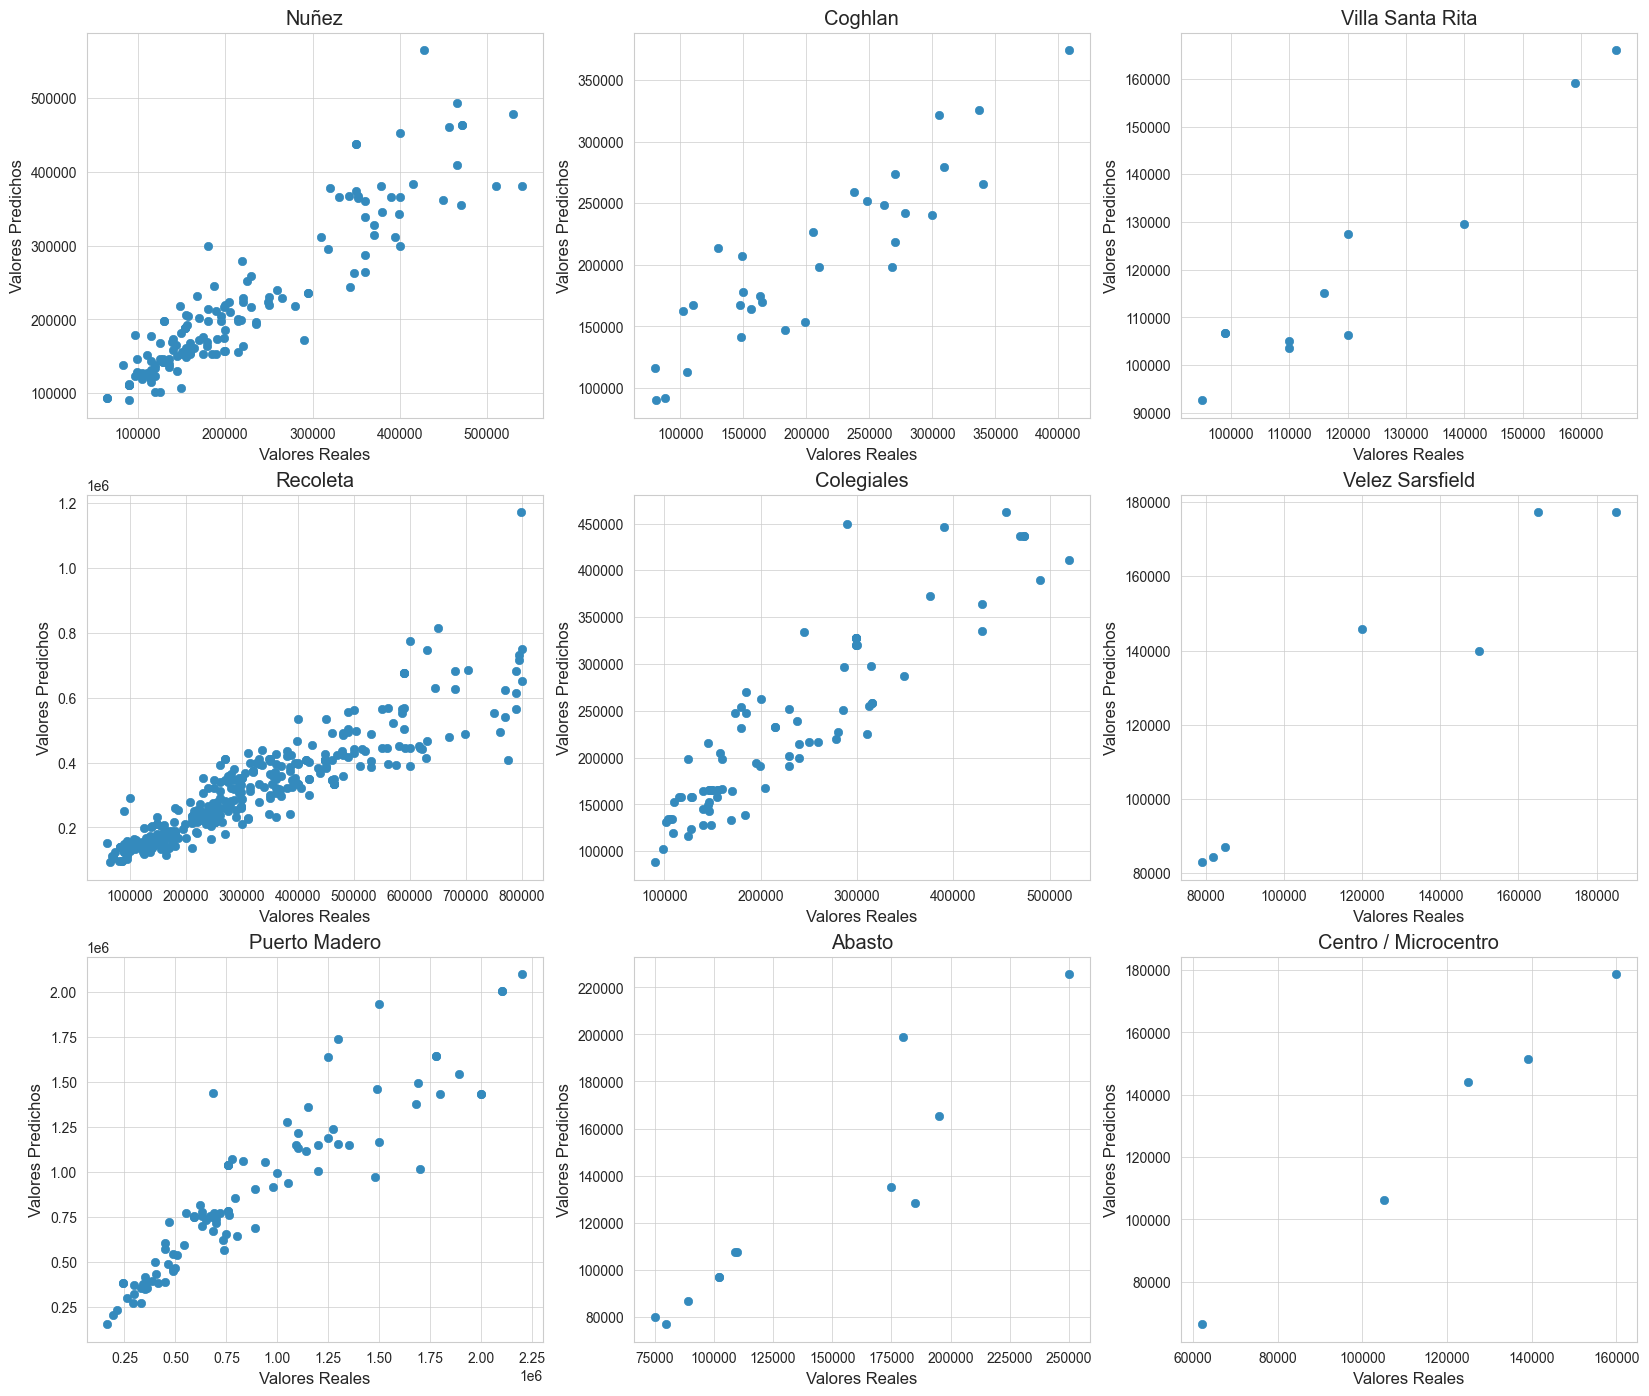

In [102]:
figure, axis = plt.subplots(3, 3, figsize=(20,17))

f,g = 0,0


for i in nombre_barrios:
    X = df_1[df_1['l3'] == i].drop(columns='price')
    Y = df_1[df_1['l3'] == i].price
    X = X.drop(columns=['l3'])

    
        

    lr = LinearRegression()

    X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=0)
    lr.fit(X_train,Y_train)
    y_pred_train = lr.predict(X_train)
    y_pred_test = lr.predict(X_test)
    r2_train = r2_score(Y_train,y_pred_train)
    r2_test = r2_score(Y_test,y_pred_test)
    if r2_test > 0.8:
        #Bucle para armar grilla de graficos
        
        print(f'{le_l3.inverse_transform([i])[0]}: R2_Score: {r2_test}, MAE: {mean_absolute_error(Y_test,y_pred_test)}, MSE: {mean_squared_error(Y_test,y_pred_test)}')
        #print(f'Barrio: {le_l3.inverse_transform([i])[0]} , R2_Train: {r2_train}, R2_Test: {r2_test}')
        axis[f, g].scatter(Y_test,y_pred_test)
        axis[f, g].set_xlabel("Valores Reales")
        axis[f, g].set_ylabel("Valores Predichos")
        axis[f, g].set_title(le_l3.inverse_transform([i])[0])
        f = f + 1
        if (f == 3):
            g = g + 1
            f = 0

plt.show()

Como vemos, los R_Squared tiene muy buena relacion y en los graficos se ve, ahora con el MAE (Mean Absolute Error) o Error medio absoluto nos indica que varia entre 1500 a 3000 aproximadamente en la mayoria de los casos, en cuestiones economicas tiene un error aproximado de entre 1500 y 3000 dolares en el precio de la vivienda que en % del total del valor de la propiedad no es una cantidad que vaya a afectar demasiado por lo tanto no se considera un error llamativo a la hora de predecir el precio.

Ya que tenemos este modelo y que por el momento nos sirve, nos vamos a enfocar en crear un modelo predictivo que gracias a la zona, la cantidad de ambientes, precio y demás, pueda clasificar si la propiedad es cara o no es cara...

## Seccion 11 - K Fold Cross Validation y probando distintos modelos de regresion

In [103]:
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn import linear_model, tree, ensemble

In [104]:
y = df_1.price
df_1.drop(['price'],axis=1,inplace=True)

x = df_1.copy()


Vamos a utilizar cross_val_score() para evaluar una puntuación mediante validación cruzada. Vamos a utilizar tres modelos diferentes para el análisis. Encontraremos la puntuación para cada división y luego tomaremos la media para obtener la puntuación global. Analizaremos el rendimiento del modelo basándonos en el error cuadrático medio (RMSE). Como el RMSE no está disponible directamente en el parámetro de puntuación, primero hallamos el error cuadrático medio y luego le sacamos la raíz cuadrada.


In [105]:
# Usaremos este objeto 'kf'(KFold splitting stratergy) como entrada para el método cross_val_score()
kf =KFold(n_splits=5, shuffle=True, random_state=42)

cnt = 1
# split()  method generate indices to split data into training and test set.
for train_index, test_index in kf.split(x, y):
    print(f'Fold:{cnt}, Train set: {len(train_index)}, Test set:{len(test_index)}')
    cnt += 1

Fold:1, Train set: 11274, Test set:2819
Fold:2, Train set: 11274, Test set:2819
Fold:3, Train set: 11274, Test set:2819
Fold:4, Train set: 11275, Test set:2818
Fold:5, Train set: 11275, Test set:2818


Usando Regresion Lineal

In [106]:
score = cross_val_score(linear_model.LinearRegression(), x, y, cv= kf, scoring="neg_mean_absolute_error")
print(f'Scores for each fold: {score}')
print(score.mean())


Scores for each fold: [-72607.26282439 -94441.62563345 -69680.68381888 -71619.41088977
 -75247.43129675]
-76719.28289264772


Utilización del árbol de decisión regresor

In [107]:
score = cross_val_score(tree.DecisionTreeRegressor(random_state= 42), x, y, cv=kf, scoring="neg_mean_absolute_error")
print(f'Scores for each fold: {score}')
print(score.mean())

Scores for each fold: [-34619.13197648 -36068.07705351 -34115.88728114 -35684.13539988
 -37768.40734305]
-35651.12781081132


Utilización del regresor Random Forest

In [108]:
score = cross_val_score(ensemble.RandomForestRegressor(random_state= 42), x, y, cv= kf, scoring="neg_mean_absolute_error")
print(f'Scores for each fold are: {score}')
print(score.mean())

Scores for each fold are: [-30057.76669685 -28914.25903346 -28864.50324721 -30478.66472176
 -32133.82710038]
-30089.804159933283


También podemos utilizar cross_val_score() junto con KFold para evaluar el modelo para diferentes hiperparámetros. Aquí vamos a probar diferentes valores de hiperparámetros y elegir aquellos para los que obtengamos la puntuación más alta del modelo.

Decision Tree Regressor Tuning

In [109]:
max_depth = [1,2,3,4,5,6,7,8,9,10]

for val in max_depth:
    score = cross_val_score(tree.DecisionTreeRegressor(max_depth= val, random_state= 42), x, y, cv= kf, scoring="neg_mean_absolute_error")
    print(f'For max depth: {val}')
    print(score.mean())

For max depth: 1
-79624.8950779475
For max depth: 2
-64350.724098862476
For max depth: 3
-58142.96094037028
For max depth: 4
-52691.77289957043
For max depth: 5
-49268.49347758325
For max depth: 6
-46509.355317014655
For max depth: 7
-44364.84505562849
For max depth: 8
-42195.72527857282
For max depth: 9
-40667.54037462695
For max depth: 10
-39506.86531333529


Random Forest Regressor Tuning

In [110]:
estimators = [50, 100, 150, 200, 250, 300, 350]

for count in estimators:
    score = cross_val_score(ensemble.RandomForestRegressor(n_estimators= count, random_state= 42), x, y, cv= kf, scoring="neg_mean_absolute_error")
    print(f'For estimators: {count}')
    print(score.mean())

For estimators: 50
-30174.41599110315
For estimators: 100
-30089.804159933283
For estimators: 150
-30084.440828692248
For estimators: 200
-30078.863183428562
For estimators: 250
-30074.95910928114
For estimators: 300
-30071.875237456166
For estimators: 350
-30087.442644538824


Despues de evaluar distintos modelos utilizando K Fold cross validation vemos que el Random Forest es mejor que la regresion lineal simple, el MAE cambia demasiado de un modelo a otro. Tambien utilizando estimadores para afinar el Modelo no hace mucha diferencia, al menos no en los terminos absolutos del precio. Por lo tanto vamos a utilizar un Random Forest sin numero de estimadores, solo utilizando un random state.

Modelo Final: **Random Forest** 

Caracteristicas: 
- random_state: 42
- n_stimators: None
- Dataset Shape: (14093,7)


## Probando el modelo con ejemplo real

En esta seccion vamos a suponer un problema e intentar resolver con el modelo finalmente solucionado.

Vamos a suponer que una inmobiliaria tiene un departamento para vender en Capital Federal, especificamente en Recoleta, y las caracteristicas del mismo son:
- 4 ambientes
- 160mts cuadrados cubiertos
- 175mts cuadrados totales (Suponemos que tiene amplio balcon)
- 3 habitaciones
- 2 Baños

Vamos a tratar de predecir el precio al que se puede vender 

In [111]:
modelo = ensemble.RandomForestRegressor(random_state=42)
modelo.fit(x,y)

RandomForestRegressor(random_state=42)

Con esta tabla podemos averiguar que etiqueta tiene cada uno de los barrios

In [124]:
x_labels = x['l3']

b = pd.DataFrame(zip(x_labels.unique(),le_l3.inverse_transform(x_labels.unique())), columns=['Label Encoded',' Inverse Label Encoded'])
b


,Label Encoded,Inverse Label Encoded
0,15,Congreso
1,9,Caballito
2,17,Flores
3,50,Villa Pueyrredón
4,24,Nuñez
5,2,Almagro
6,37,Saavedra
7,26,Palermo
8,44,Villa Crespo
9,54,Villa Urquiza


In [127]:
#variables
ambientes = 4
mtscubiertos = 160
mtstotales = 175
habitaciones = 3
baños = 2
barrio = 35


Llamamos a la funcion predit() para averiguar el precio

Estructura del array

[barrio,ambientes,habitaciones,baños,mtstotales,mtscubiertos]

In [135]:
precio_Final = modelo.predict([[barrio,ambientes,habitaciones,baños,mtstotales,mtscubiertos]])
print(f'El precio final para la propiedad elegida es U$D{precio_Final[0]}')

El precio final para la propiedad elegida es U$D555220.0
